In [5]:
import pandas as pd 
import numpy as np 
import sklearn

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")


7-23-Twitter-Classification-Notebook.ipynb
Data Cleaning.ipynb
Data Exploration-Visualizations.ipynb
Dataset-2-Notebook.ipynb
Dataset2
README.md
custom_functions.ipynb
data
old_files


In [7]:
%run custom_functions_2.ipynb

ERROR:root:File `'custom_functions_2.ipynb.py'` not found.


## Data Visualization

In [7]:
df = pd.read_csv('data/cleaned-reshuffled.csv')

df.head()

,Unnamed: 0,id,label,tweet,tidy_tweet,tokenized_tweet,stemmed_tweet,no_hash_tweet,lemmatized_tweet,stemmed_tweet_meta
0,0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,"['sad', 'to', 'see', 'the', 'scenes', 'of', 'h...","['sad', 'to', 'see', 'the', 'scene', 'of', 'ho...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...,sad to see the scene of hooligan pre engrus wh...
1,1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,"['gooddyeyoung', 'yoyoyo', 'super', 'happy', '...","['gooddyeyoung', 'yoyoyo', 'super', 'happi', '...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happi to be apa of t...
2,2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,"['queen', 'evil', 's', 'bihday', 'lnic', 'lnic...","['queen', 'evil', 's', 'bihday', 'lnic', 'lnic...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,"['you', 'might', 'be', 'a', 'libtard', 'if', '...","['you', 'might', 'be', 'a', 'libtard', 'if', '...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liber polit
4,4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,"['what', 'are', 'your', 'goals', 'find', 'out'...","['what', 'are', 'your', 'goal', 'find', 'out',...",what are your goals find out here smile,what are your goals find out here smile,what are your goal find out here smile


In [68]:
# from PIL import Image
# cloud_mask = np.array(Image.open("twitter.png"))
# cloud_mask

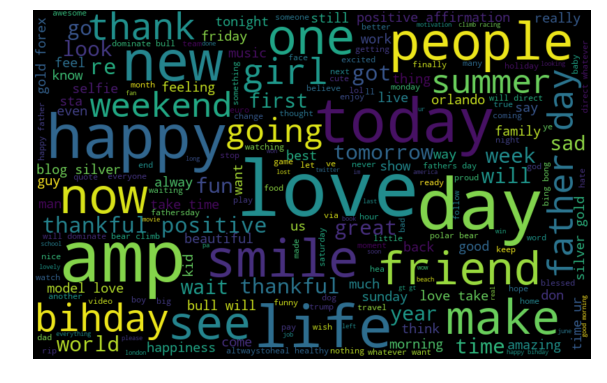

In [676]:
from wordcloud import WordCloud

df_0_words = ' '.join([text for text in df['tidy_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=10, max_font_size=110).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
df_0_words

'scenes hooligans #engrus spoil #euro #gooddyeyoung #yoyoyo super happy movement queen evil bihday #lnic #lnicjustanevilbday #bihday #suit #evil #love #yolo #stoops #seriously what your goals find here #smile retweets #nuascannan classic trump follower mixture emotions here from weekend #pride meps bear that travelled sandy hook with hope that another massacre would never occur again just because affected abuse prompts angela kennedy change stance thomas always says live dream world this real life just might seem like dream others life #blessed when local library tries charge once again fees already paid twice before #ineedtosavethereceipt #frustrated #cia #ncs #sockpuppetarmy #hbgary troll #snowden their #sop logical fallacies saying year anniversary michael jackson vindication #the happiest michael jackson fans over everyone that says cringe cool amirite #twitch ontwitch #gaming #rant good morning #life #blackhair #travel #home #cheltenham #hamburg #hamburgcity #london talk food ever

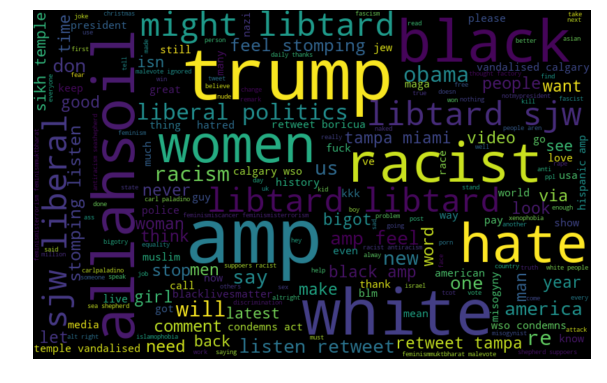

In [672]:
df_1_words = ' '.join([text for text in df['tidy_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=210, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [72]:
df_1_words

'might libtard #libtard #sjw #liberal #politics rise today stories police brutality from #police ouch woow #sexy vandals turned jewish family menorah into swastika #antisemitism #hate reality that tech industry made regular people #tech #discrimination ways #facebook #repoingsystem fails #communitystandards users #blacklivesmatter prison officers goaded #muslim inmates until they needed restrained game have love some even against #mexicans #lmao latest science daily thanks trump real estate buddy carl paladino wishes obama dead disease that systemic rather than just humanity being human power reinforced each minute unamerican #fact your people would have died scurvy their first winter first nations hadn shown them cute #feminismiscancer #feminismisterrorism #feminismmuktbharat #malevote ignored invited help actions #peace #povey sept #feminismiscancer #feminismisterrorism #feminismmuktbharat #malevote ignored #black feel like stomping listen #retweet #tampa #miami must said #trump vote

In [612]:
# function to collect hashtags
def hashtag_extract(tweet):
    hashtags = []
    # Loop over the words in the tweet
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)

    return hashtags

In [613]:
# extracting hashtags from non racist/sexist tweets
HT_0 = hashtag_extract(df['tidy_tweet_2'][df['label']==0])

# extracting hashtags from racist/sexist tweets
HT_1 = hashtag_extract(df['tidy_tweet_2'][df['label']==1])


In [614]:
HT_0

[['engrus', 'euro'],
 ['gooddyeyoung', 'yoyoyo'],
 ['lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['smile'],
 ['nuascannan'],
 [],
 ['pride'],
 [],
 [],
 ['blessed'],
 ['ineedtosavethereceipt', 'frustrated'],
 ['cia', 'ncs', 'sockpuppetarmy', 'hbgary', 'snowden', 'sop'],
 ['the'],
 ['twitch', 'gaming', 'rant'],
 ['life',
  'blackhair',
  'travel',
  'home',
  'cheltenham',
  'hamburg',
  'hamburgcity',
  'london'],
 ['everycharactermatters'],
 ['lightroom'],
 ['udtapunjab', 'amarinder', 'aap'],
 [],
 ['love',
  'nature',
  'beauty',
  'garden',
  'outdoors',
  'pretty',
  'cute',
  'lovely',
  'beautiful',
  'fun',
  'water',
  'sun',
  'life',
  'inst'],
 [],
 ['pretty'],
 ['bigbiz', 'venezuela'],
 ['sacs',
  'photooftheday',
  'music',
  'instamood',
  'photography',
  'instadaily',
  'nike',
  'family',
  'design'],
 [],
 ['fun',
  'bekindalways',
  'animation',
  'bekindtoanimals',
  'recycling',
  'forests'],
 [],


In [76]:
# unnesting lists
HT_0 = sum(HT_0,[])
HT_1 = sum(HT_1,[])

In [77]:
HT_0

['engrus',
 'euro',
 'gooddyeyoung',
 'yoyoyo',
 'lnic',
 'lnicjustanevilbday',
 'bihday',
 'suit',
 'evil',
 'love',
 'yolo',
 'stoops',
 'seriously',
 'smile',
 'nuascannan',
 'pride',
 'blessed',
 'ineedtosavethereceipt',
 'frustrated',
 'cia',
 'ncs',
 'sockpuppetarmy',
 'hbgary',
 'snowden',
 'sop',
 'the',
 'twitch',
 'gaming',
 'rant',
 'life',
 'blackhair',
 'travel',
 'home',
 'cheltenham',
 'hamburg',
 'hamburgcity',
 'london',
 'everycharactermatters',
 'lightroom',
 'udtapunjab',
 'amarinder',
 'aap',
 'love',
 'nature',
 'beauty',
 'garden',
 'outdoors',
 'pretty',
 'cute',
 'lovely',
 'beautiful',
 'fun',
 'water',
 'sun',
 'life',
 'inst',
 'pretty',
 'bigbiz',
 'venezuela',
 'sacs',
 'photooftheday',
 'music',
 'instamood',
 'photography',
 'instadaily',
 'nike',
 'family',
 'design',
 'fun',
 'bekindalways',
 'animation',
 'bekindtoanimals',
 'recycling',
 'forests',
 'puppy',
 'cute',
 'morning',
 'breakfast',
 'yum',
 'foodporn',
 'greece',
 'firstcoffee',
 'milos',


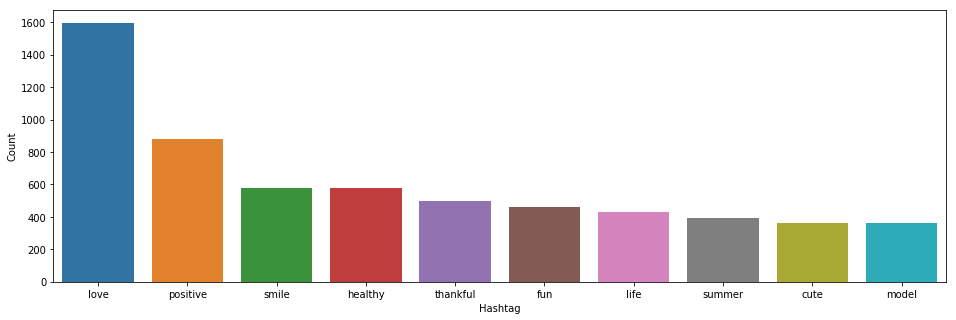

In [78]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

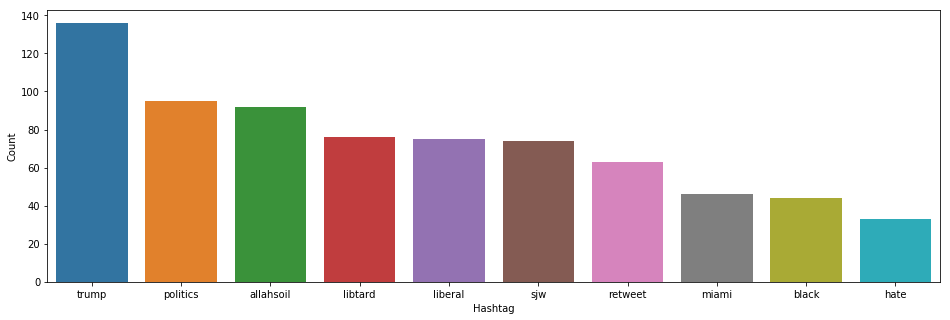

In [79]:
b = nltk.FreqDist(HT_1)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [80]:
meta_freqdist = FreqDist(HT_1)
meta_freqdist.most_common(10)

[('trump', 136),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 33)]

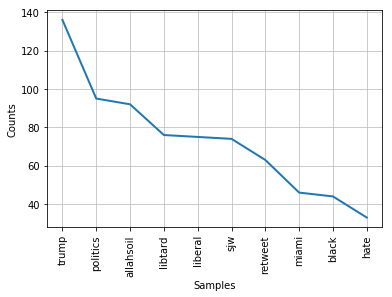

In [81]:
meta_freqdist.plot(10,cumulative=False)

In [82]:
meta_freqdist = FreqDist(HT_0)
meta_freqdist.most_common(10)

[('love', 1596),
 ('positive', 880),
 ('smile', 581),
 ('healthy', 576),
 ('thankful', 496),
 ('fun', 463),
 ('life', 431),
 ('summer', 395),
 ('cute', 365),
 ('model', 365)]

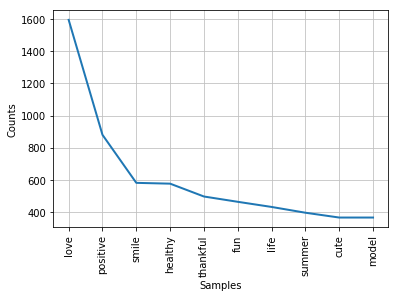

In [83]:
meta_freqdist.plot(10,cumulative=False)

## Bigram

In [663]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
meta_finder = BigramCollocationFinder.from_words(df['no_hash_tweet'])


In [664]:
bigram_scored = meta_finder.score_ngrams(bigram_measures.raw_freq)


In [665]:
bigram_scored

[(('model i love u take with u all the time in ur',
   'model i love u take with u all the time in ur'),
  0.00012514861397910017),
 (('you might be a libtard if libtard sjw liberal politics',
   'i finally found a way how to delete old tweets you might find it useful as well deletetweets'),
  9.386146048432514e-05),
 (('i am thankful for tears thankful positive',
   'model i love u take with u all the time in ur'),
  6.257430698955009e-05),
 (('i finally found a way how to delete old tweets you might find it useful as well deletetweets',
   'vehicle gorilla simulator you need to do to adapt to the environment the need to tear the city materia'),
  6.257430698955009e-05),
 (('model i love u take with u all the time in ur',
   'i m so and grateful now that affirmations'),
  6.257430698955009e-05),
 (('parente bull up you will dominate your bull and you will direct it whatever you want it to do when you',
   'model i love u take with u all the time in ur'),
  6.257430698955009e-05),
 (('